In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path="/data/data/mnist.npz")   #加载mnist数据集

In [3]:
#验证mnist数据集大小。x为数据，y为标签。mnist每张图的像素为28*28
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


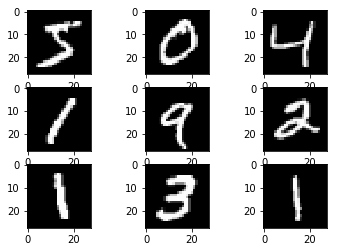

In [4]:
#打印训练集中前9张，看看是什么数字
for i in range(9):  
    plt.subplot(3,3,1+i)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [5]:
#打印相应的标签
print(y_train[:9])

[5 0 4 1 9 2 1 3 1]


In [6]:
#基操：将像素标准化一下
x_train, x_test = x_train / 255.0, x_test / 255.0

#搭建一个两层神经网络
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),    #拉伸图像成一维向量
  tf.keras.layers.Dense(128, activation='relu'),    #第一层全连接+ReLU激活
  tf.keras.layers.Dropout(0.2),                     #dropout层
  tf.keras.layers.Dense(10, activation='softmax')   #第二层全连接+softmax激活，输出预测标签
])

In [7]:
#设置训练超参，优化器为Adam，损失函数为交叉熵，训练衡量指标为accuracy
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#开始训练，训练10个epoch，一个epoch代表所有图像计算一遍。每一个epoch能观察到训练精度的提升
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2971 - accuracy: 0.9140
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1436 - accuracy: 0.9574
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1094 - accuracy: 0.9670
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0869 - accuracy: 0.9731
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0740 - accuracy: 0.9771
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0640 - accuracy: 0.9800
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0588 - accuracy: 0.9807
Epoch 8/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0530 - accuracy: 0.9826
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0469 - accuracy: 0.9845
Epoch 10/10
60000/60000 [============

In [8]:
#计算训练了10个epoch的模型在测试集上的表现
model.evaluate(x_test,  y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0695 - accuracy: 0.9808


[0.06950160280249547, 0.9808]

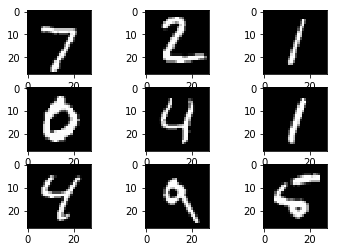

In [9]:
#直观看一下模型预测结果，打印测试集中的前9张图像
for i in range(9):  
    plt.subplot(3,3,1+i)
    plt.imshow(x_test[i], cmap='gray')
plt.show()

In [10]:
#打印模型识别的数字，是否正确？
np.argmax(model(x_test[:9]).numpy(), axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [11]:
#保存训练好的模型
model.save("/data/output/model_epoch_5")